In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

import os
os.chdir("/Users/deweywang/Desktop/GitHub/HEVisum/")


# Training data preparation 

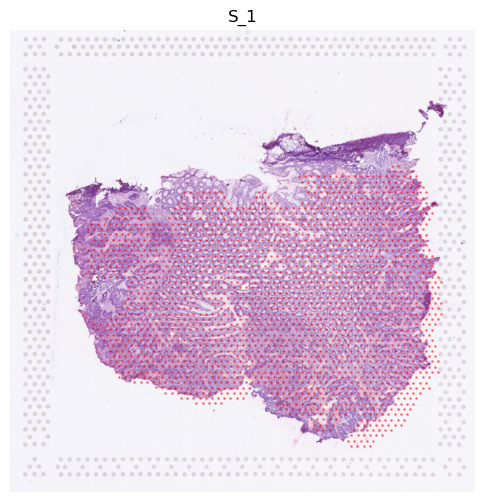

In [220]:
with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]
    
    sample = 'S_1'
    image = np.array(train_images[sample])
    spots = np.array(train_spots[sample])
    x, y = spots["x"], spots["y"]
    
    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

## Training data augmentation

In [45]:

# Load and display (x,y) spot locations and cell type annotation table for Train slides
with h5py.File("./dataset/processed_train_spots.h5", "r") as f:
    train_spots = f["spots/log2_Train"]
    
    # Dictionary to store DataFrames for each slide
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        # Load dataset as NumPy structured array
        spot_array = np.array(train_spots[slide_name])
        
        # Convert to DataFrame
        df = pd.DataFrame(spot_array)
        
        # Store in dictionary
        train_spot_tables[slide_name] = df
        print(slide_name)

# Example: Display the spots table for slide 'S_1'
train_spot_tables['S_1']

S_1
S_2
S_3
S_4
S_5
S_6


x     y  zscore_log2_filtered_C1  zscore_log2_filtered_C2  \
0     1554  1297                -0.682399                -0.486604   
1      462  1502                -0.494081                 0.851039   
2     1488  1548                -0.464161                -0.709324   
3     1725  1182                -0.544981                 1.188377   
4      581  1113                -0.472547                -0.396244   
...    ...   ...                      ...                      ...   
2144  1055   701                -0.619665                 0.062232   
2145  1225   862                -0.575912                 0.125898   
2146   765  1479                -0.360575                -0.583202   
2147   607  1525                -0.704720                 0.435346   
2148   568  1181                -0.710099                -1.038225   

      zscore_log2_filtered_C3  zscore_log2_filtered_C4  \
0                   -0.675375                -0.630631   
1                   -0.446648                -0.454476   
2                   -0.571479                -0.624617   
3                   -0.497213                -0.577362   
4                   -0.475592                -0.435909   
...                       ...                      ...   
2144                -0.594557                -0.628926   
2145                -0.247509                -0.632671   
2146                -0.350557                -0.625037   
2147                -0.691855                -0.637809   
2148                -0.731571                -0.623952   

      zscore_log2_filtered_C5  zscore_log2_filtered_C6  \
0                   -0.087697                 1.867268   
1                    2.485569                -0.548122   
2                    0.471550                -0.513574   
3                    2.485569                 1.352764   
4                    1.786346                -0.637150   
...                       ...                      ...   
2144                -0.842855                 1.867268   
2145                -0.837670                 1.867268   
2146                -0.645280                -0.649256   
2147                 0.670466                -0.650173   
2148                 0.266999                -0.652094   

      zscore_log2_filtered_C7  zscore_log2_filtered_C8  ...  \
0                   -0.582425                 1.972258  ...   
1                    1.116866                -0.458160  ...   
2                   -0.716618                -0.709200  ...   
3                    2.285996                 0.862122  ...   
4                   -0.331702                -0.653593  ...   
...                       ...                      ...  ...   
2144                 0.060022                 1.368926  ...   
2145                -0.099108                -0.087897  ...   
2146                -0.801054                -0.714806  ...   
2147                -0.496696                -0.527895  ...   
2148                -0.832314                -0.726604  ...   

      zscore_log2_filtered_C26  zscore_log2_filtered_C27  \
0                    -0.608880                  1.889307   
1                    -0.635557                 -0.508851   
2                    -0.685620                  0.704991   
3                    -0.528791                  0.643741   
4                    -0.687626                 -0.590609   
...                        ...                       ...   
2144                 -0.063283                  1.889307   
2145                  1.920233                  1.889307   
2146                 -0.671584                 -0.645177   
2147                 -0.578006                 -0.611506   
2148                 -0.693591                 -0.632580   

      zscore_log2_filtered_C28  zscore_log2_filtered_C29  \
0                     1.962398                 -0.394728   
1                    -0.680085                  0.300420   
2                    -0.579491                 -0.674142   
3                    -0.524663                  1.241803

## Smooth spots

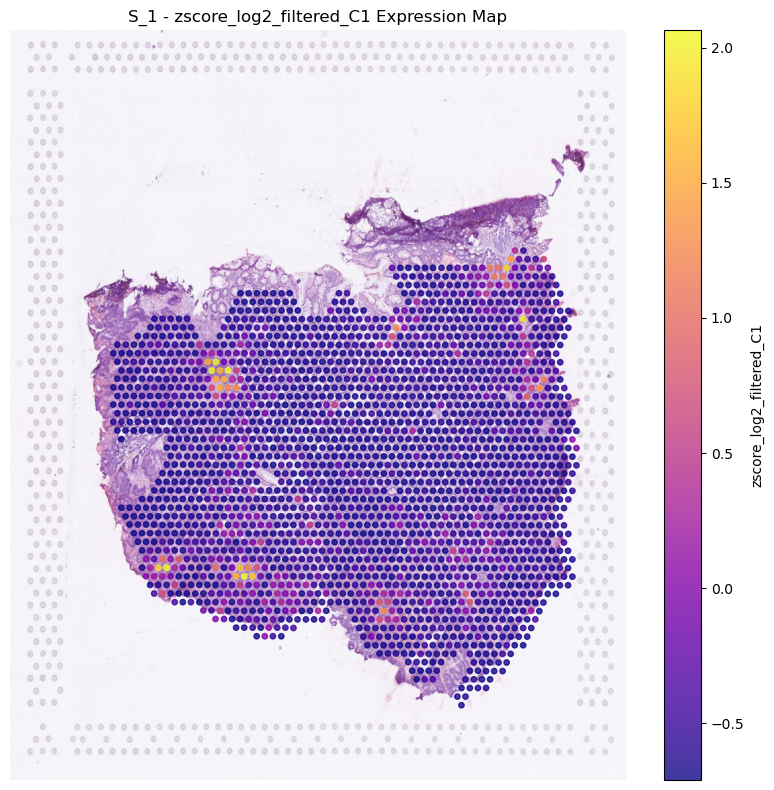

In [2]:
from python_scripts.expression_plot_utils import plot_cell_expression_on_slide
plot_cell_expression_on_slide(
    slide_id = "S_1",
    cell_type = "C1",
    cell_prefix="zscore_log2_filtered_",  # or zscore_boxcox_filtered_
    image_path="./dataset/elucidata_ai_challenge_data.h5",
    spot_path="./dataset/processed_train_spots.h5",
    group_name="log2_Train"
)

/Users/deweywang/Desktop/GitHub/HEVisum/python_scripts/expression_plot_utils.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


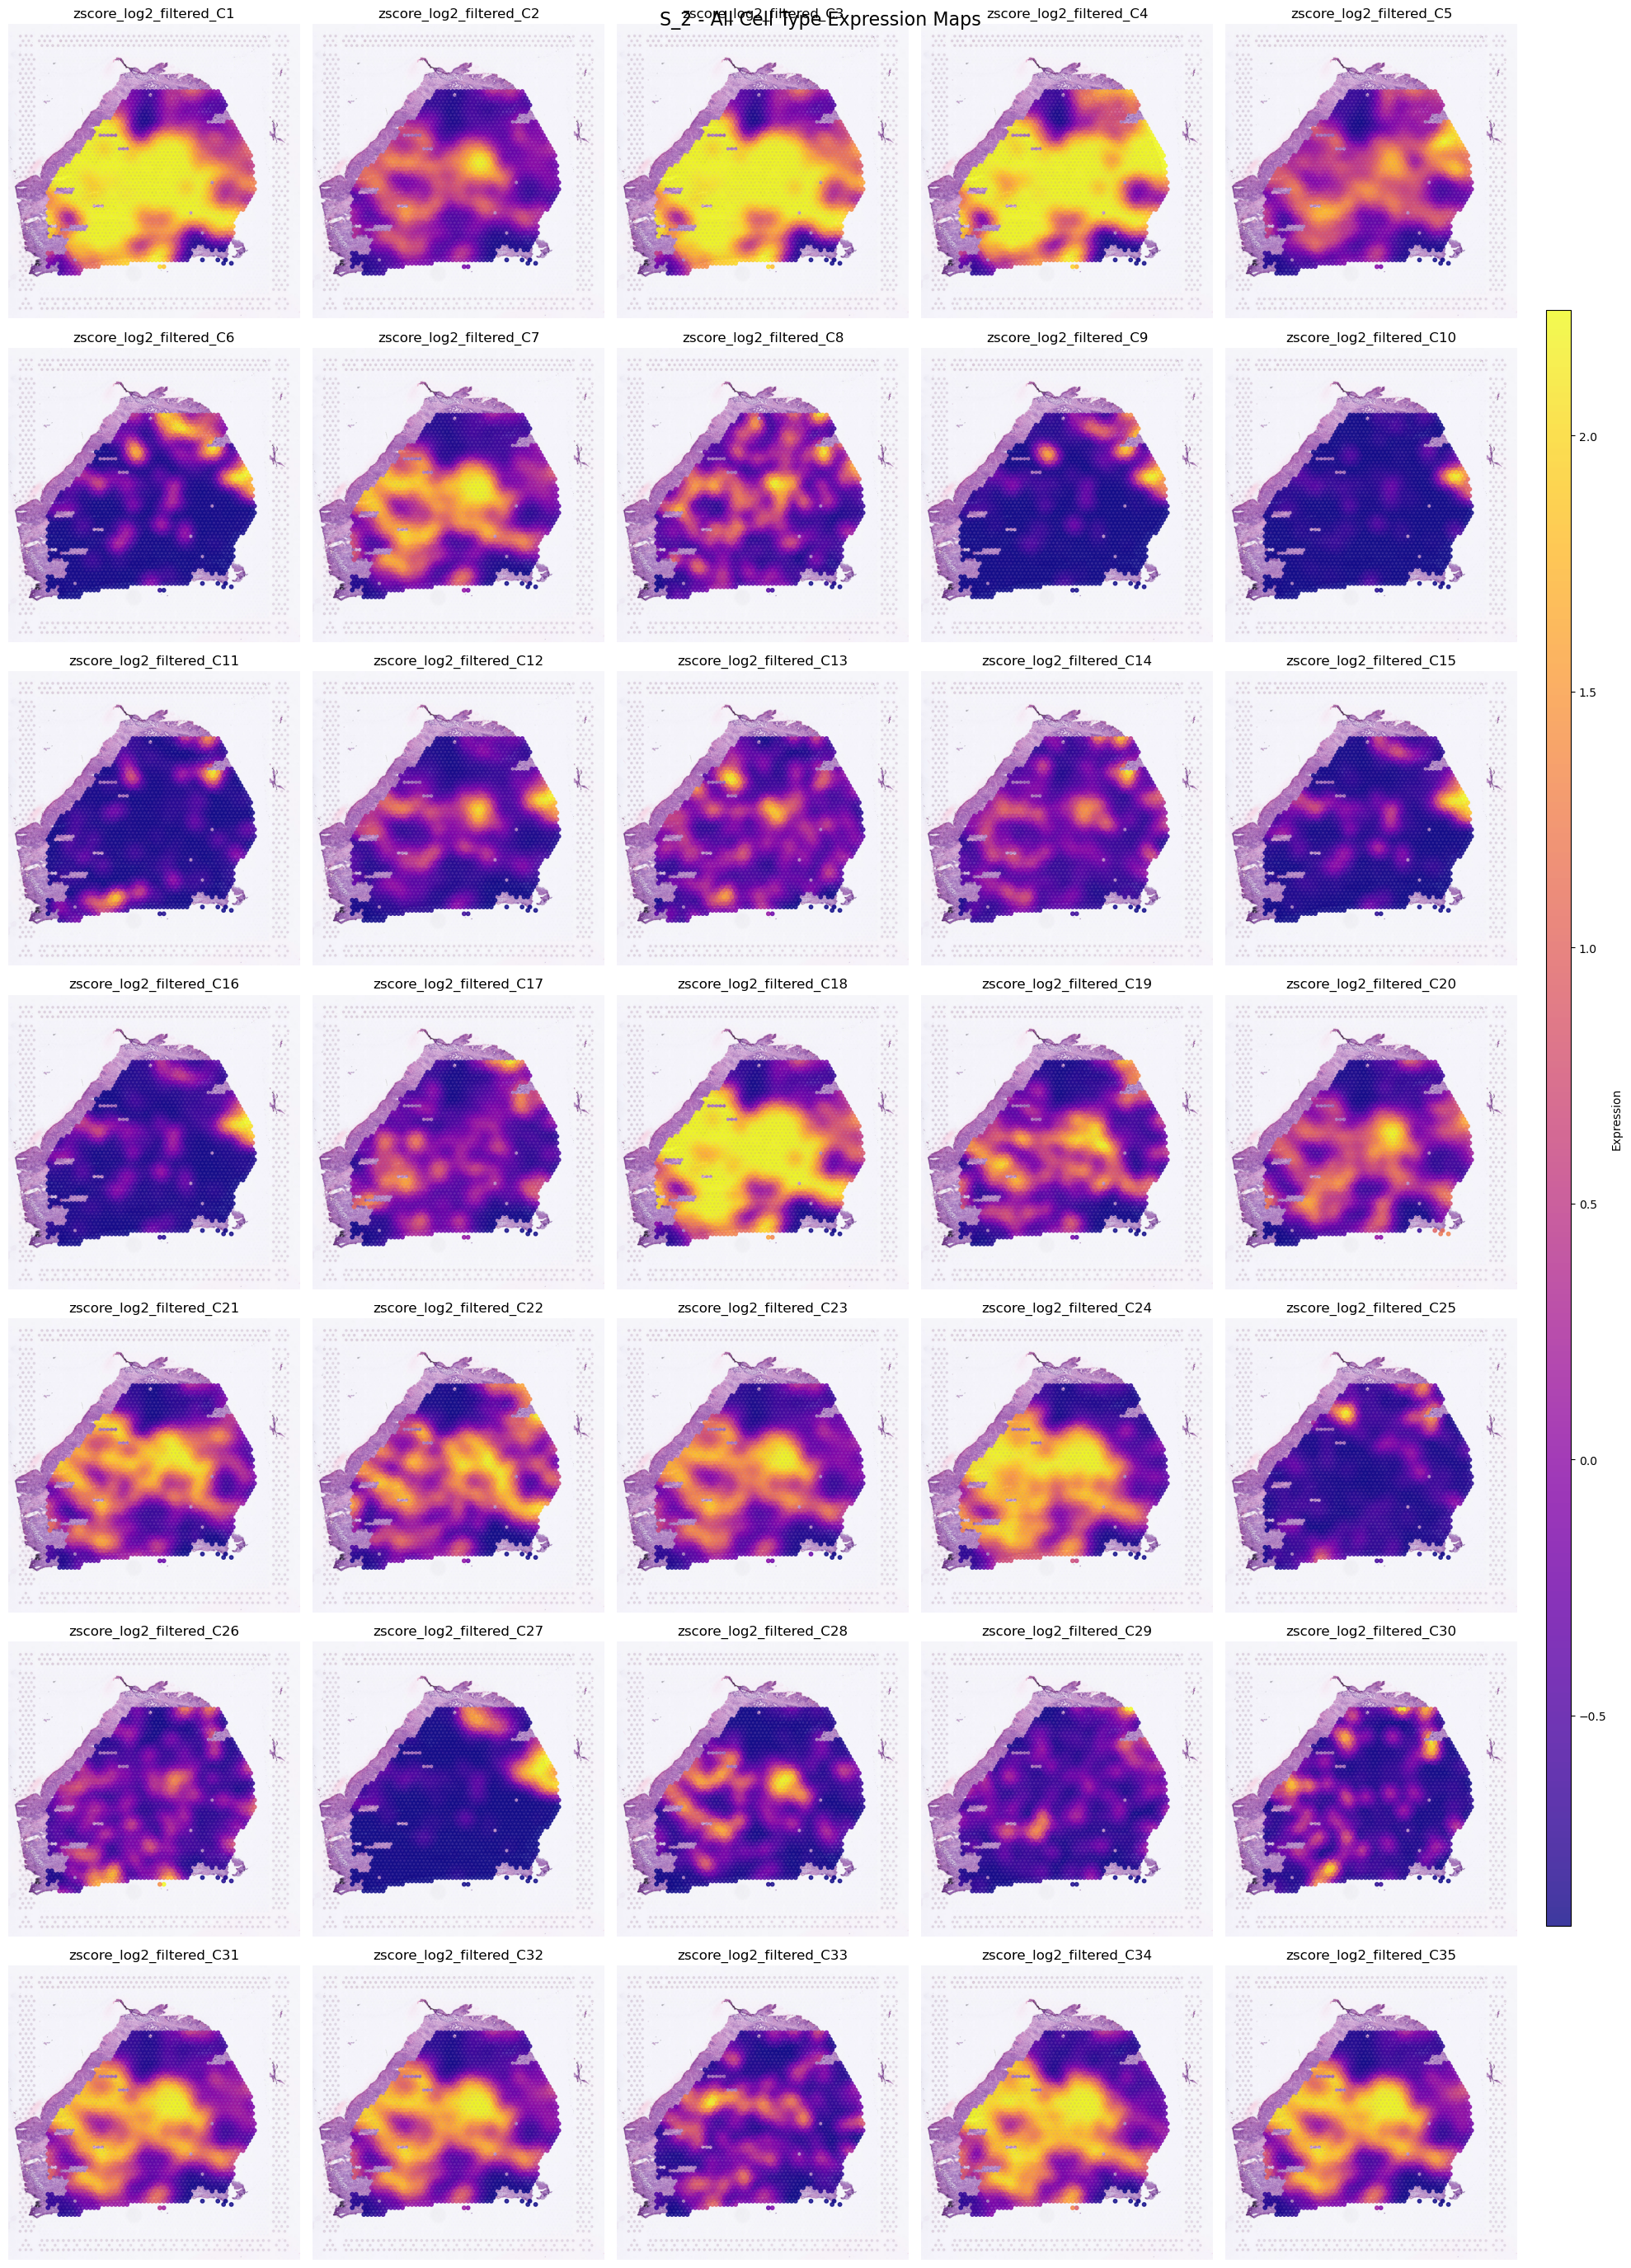

In [3]:
from python_scripts.expression_plot_utils import plot_all_celltypes_on_slide
plot_all_celltypes_on_slide(
    slide_id = "S_2",
    cell_prefix="zscore_log2_filtered_",
    image_path="./dataset/elucidata_ai_challenge_data.h5",
    spot_path="./dataset/gu_smooth_processed_train_spots.h5",
    group_name="log2_Train"
)

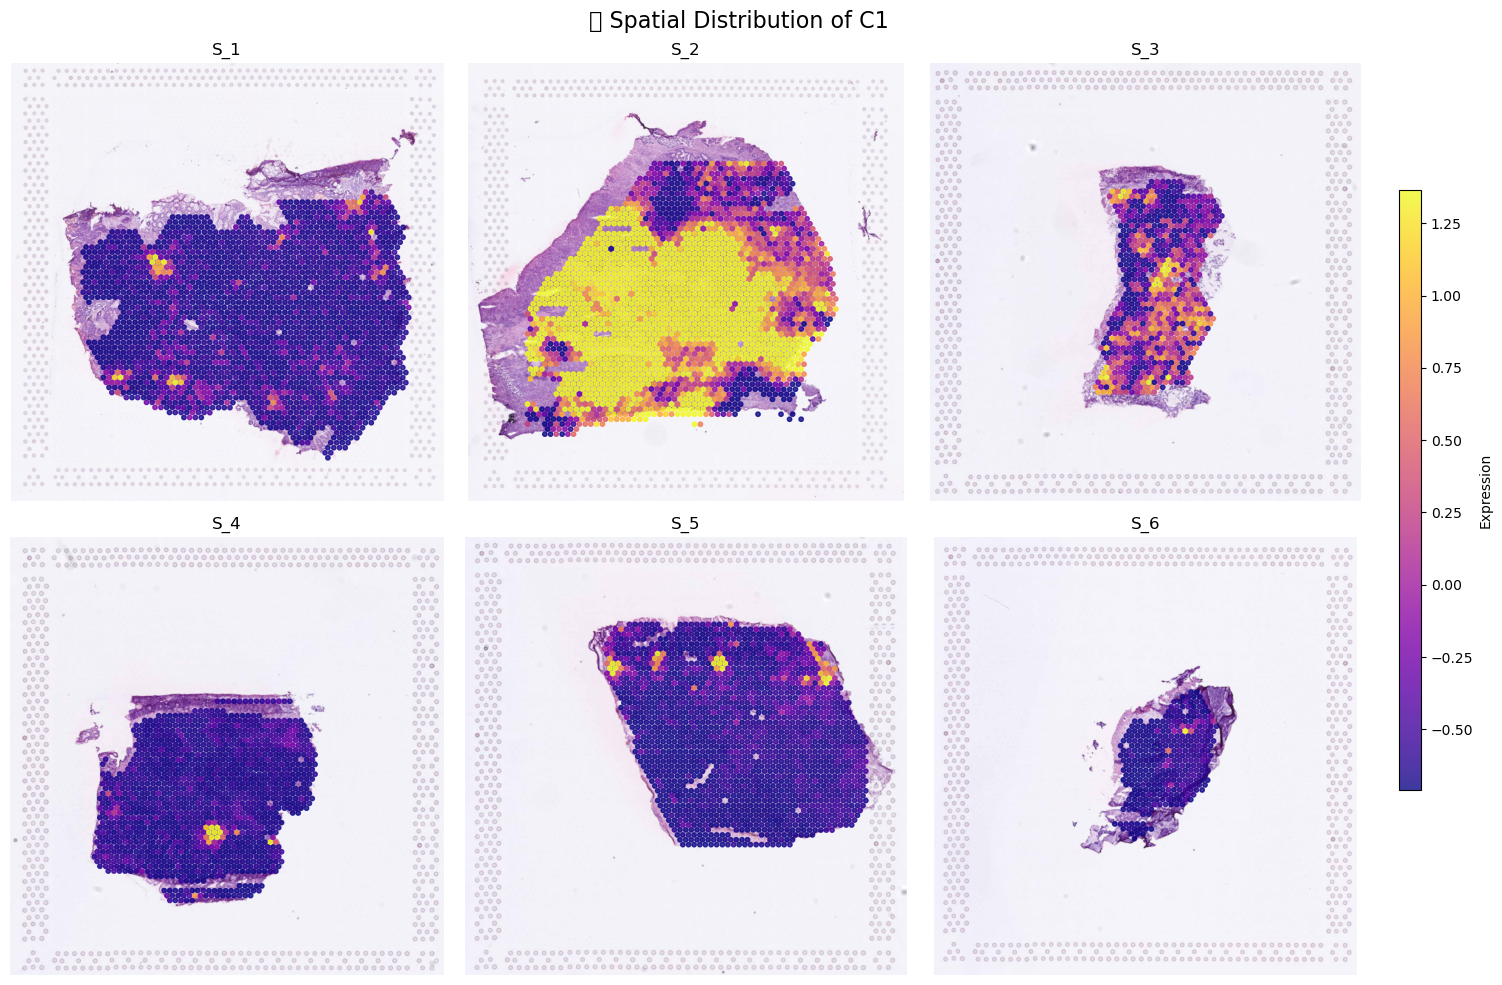

In [117]:
from python_scripts.expression_plot_utils import plot_cell_expression_all_slides
plot_cell_expression_all_slides(
    cell_short_name='C1',
    cell_prefix='zscore_log2_filtered_',
    image_path="./dataset/elucidata_ai_challenge_data.h5",
    spot_path="./dataset/processed_train_spots.h5",
    group_name="log2_Train"
)

In [107]:
from sklearn.neighbors import KDTree
import numpy as np
import pandas as pd
from python_scripts.spatial_smooth import gaussian_spatial_smoothing
from python_scripts.spatial_smooth import plot_cell_expression_comparison

cell_type_cols = [col for col in train_spot_tables["S_1"].columns if col.startswith("zscore_log2_filtered_C")]
smoothed_df = gaussian_spatial_smoothing(train_spot_tables["S_2"], cell_type_cols, radius=80)


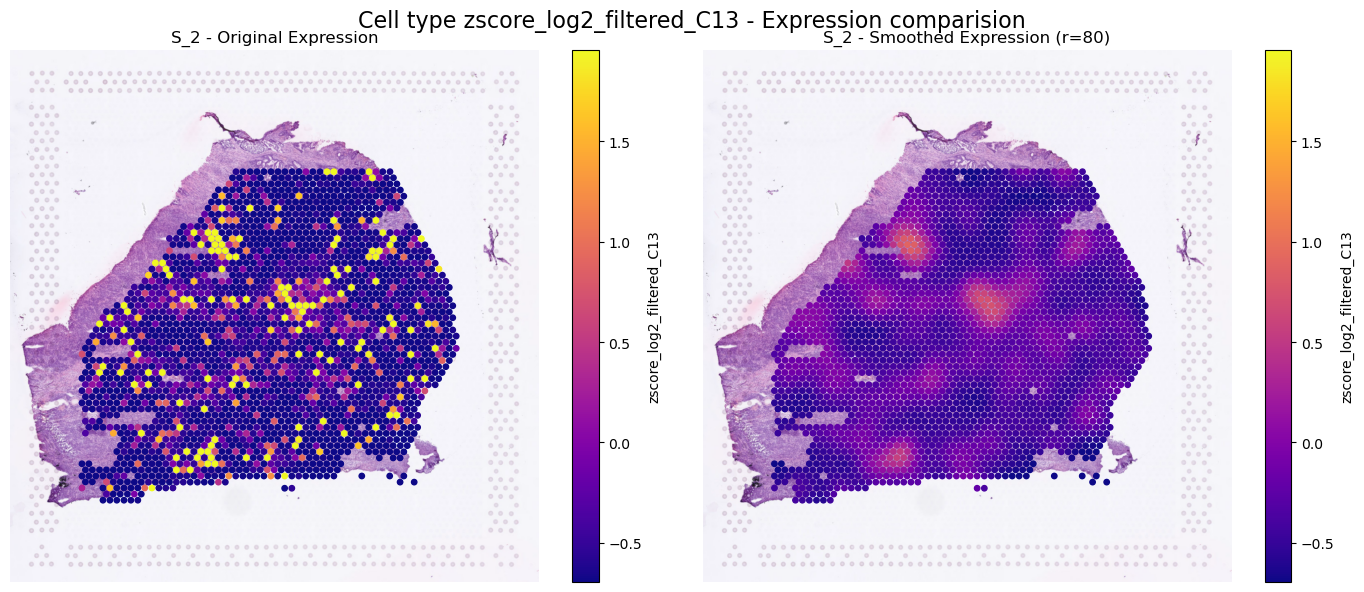

In [108]:
cell_type = "zscore_log2_filtered_C13"  # 可以換成任何你要看的 Cx
plot_cell_expression_comparison(
    slide_id="S_2",
    cell_type=cell_type,
    original_df=train_spot_tables["S_2"],
    smoothed_df=smoothed_df,
    radius = 80,
    h5_path="./dataset/elucidata_ai_challenge_data.h5"
)

In [109]:
import h5py
import numpy as np
from python_scripts.spatial_smooth import smooth_all_slides_and_save
# 先載入原本的資料（跟你之前一樣）
with h5py.File("./dataset/processed_train_spots.h5", "r") as f:
    train_spots = f["spots/log2_Train"]
    train_spot_tables = {
        slide: pd.DataFrame(np.array(train_spots[slide]))
        for slide in train_spots.keys()
    }

# 找出所有 cell type 欄位（z-score 後的）
cell_type_cols = [col for col in train_spot_tables["S_1"].columns if col.startswith("zscore_log2_filtered_C")]

# 設定儲存路徑
output_path = "./dataset/gu_smooth_processed_train_spots.h5"

# 執行平滑與儲存
smooth_all_slides_and_save(train_spot_tables, cell_type_cols, output_path, radius=80)


Processing slides: 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

✅ 所有 slide 都已平滑並存成 ./dataset/gu_smooth_processed_train_spots.h5，格式與 processed_train_spots.h5 相同！
